<a href="https://colab.research.google.com/github/MiraHatoum/-AAI614_Hatoum/blob/main/Outlier_Detection_With_IQR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I am using a Dataset already has been sent to us in Machine Learning course.

In [1]:
from google.colab import files

# Upload the file
uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers.csv


In [6]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

# Display the first few rows
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [7]:
data.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
data.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [9]:
# Identifying numerical columns in the dataset
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Displaying numerical columns to select for outlier detection
numerical_columns.tolist()

['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [10]:
# Check the dataset shape
print("Dataset Shape:", df.shape)

# Check column information
print("\nDataset Info:\n")
print(df.info())

# Check for missing values
print("\nMissing Values:\n")
print(df.isnull().sum())


Dataset Shape: (200, 5)

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Missing Values:

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


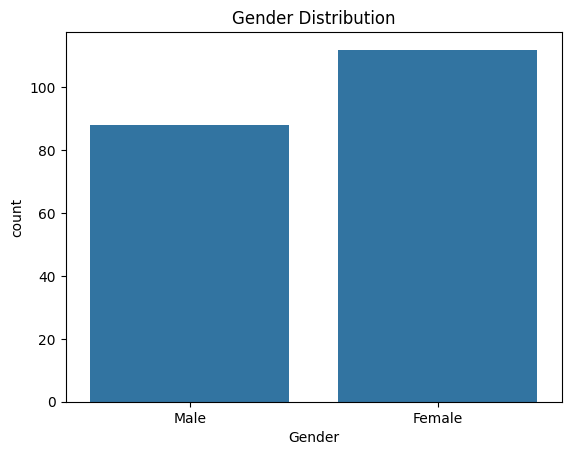

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.show()


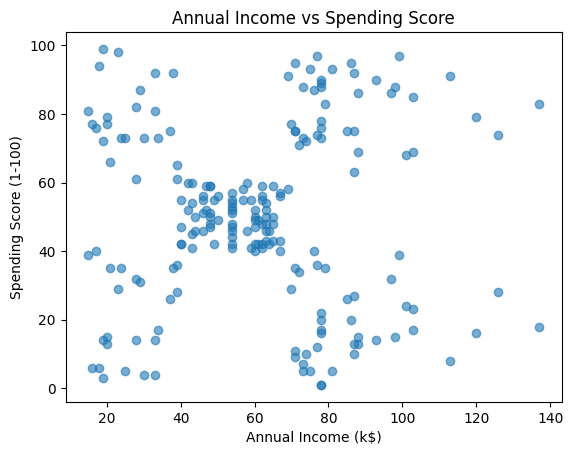

In [12]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], alpha=0.6)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [13]:
from sklearn.cluster import KMeans

# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Display sample data
print("Sample Data:\n", X.head())


Sample Data:
    Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


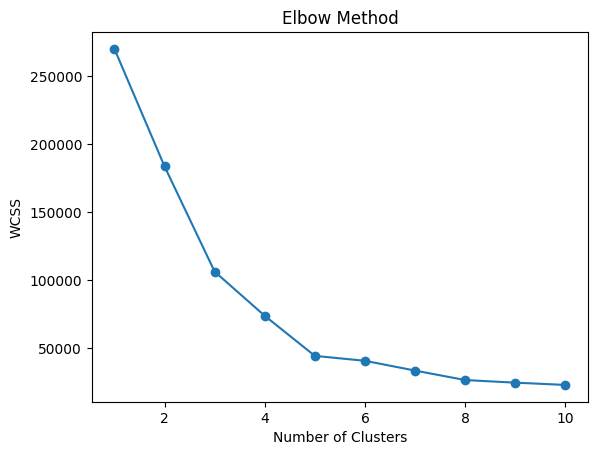

In [14]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [15]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add cluster labels to the original dataset
df['Cluster'] = y_kmeans

# Display the clustered data
print("Clustered Data:\n", df.head())


Clustered Data:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


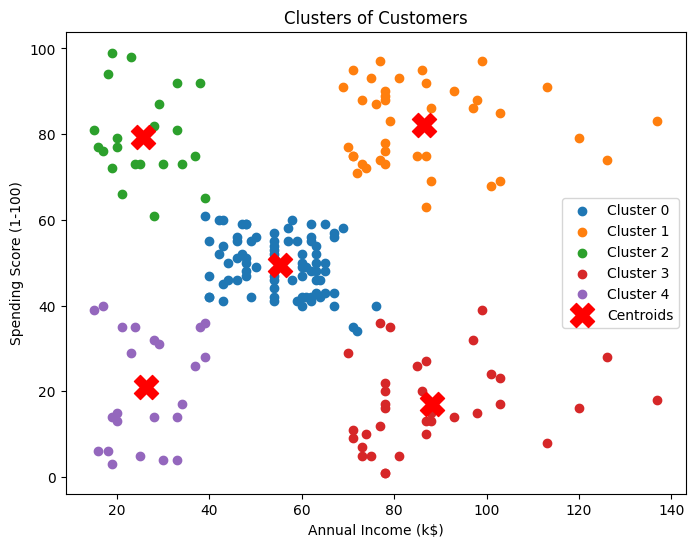

In [16]:
# Plot clusters
plt.figure(figsize=(8, 6))
for cluster in range(5):
    cluster_data = X[y_kmeans == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids', marker='X')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


Outlier Detection Using IQR

In [17]:
# Outlier detection using IQR
def detect_outliers_iqr(data, columns):
    outliers = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index.tolist()
    return outliers


In [19]:
import pandas as pd


# Selecting relevant columns for outlier detection
columns_of_interest = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Applying the IQR method to the selected columns
outliers_info = {}
for col in columns_of_interest:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df, col)
    outliers_info[col] = {
        "Outliers": outliers,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound
    }

# Displaying outliers summary for each column
outliers_summary = {
    col: {
        "Number of Outliers": len(info["Outliers"]),
        "Lower Bound": info["Lower Bound"],
        "Upper Bound": info["Upper Bound"]
    }
    for col, info in outliers_info.items()
}

# Convert summary to DataFrame
outliers_summary_df = pd.DataFrame(outliers_summary).transpose()
print("\nOutliers Summary:")
print(outliers_summary_df)

# Example: Viewing outliers for a specific column (e.g., 'Annual Income (k$)')
print("\nOutliers for 'Annual Income (k$)':")
print(outliers_info['Annual Income (k$)']["Outliers"])




Outliers Summary:
                        Number of Outliers  Lower Bound  Upper Bound
Age                                    0.0       -1.625       79.375
Annual Income (k$)                     2.0      -13.250      132.750
Spending Score (1-100)                 0.0      -22.625      130.375

Outliers for 'Annual Income (k$)':
     CustomerID Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
198         199   Male   32                 137                      18   
199         200   Male   30                 137                      83   

     Cluster  
198        3  
199        1  


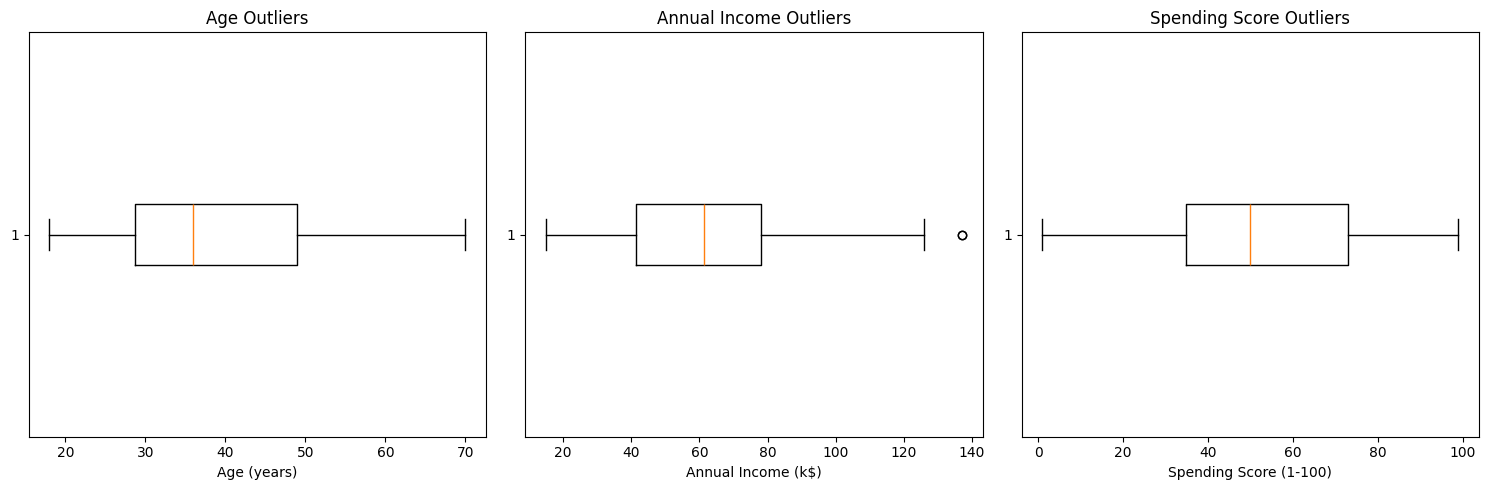

In [20]:
import matplotlib.pyplot as plt

# Creating boxplots for the selected columns
plt.figure(figsize=(15, 5))

# Age
plt.subplot(1, 3, 1)
plt.boxplot(df['Age'].dropna(), vert=False)
plt.title("Age Outliers")
plt.xlabel("Age (years)")

# Annual Income
plt.subplot(1, 3, 2)
plt.boxplot(df['Annual Income (k$)'].dropna(), vert=False)
plt.title("Annual Income Outliers")
plt.xlabel("Annual Income (k$)")

# Spending Score
plt.subplot(1, 3, 3)
plt.boxplot(df['Spending Score (1-100)'].dropna(), vert=False)
plt.title("Spending Score Outliers")
plt.xlabel("Spending Score (1-100)")

plt.tight_layout()
plt.show()


Let's highlight key outliers:

In [21]:
# Highlighting key outliers for selected columns in the Mall Customers dataset
key_outliers = {}
for col in columns_of_interest:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df, col)
    key_outliers[col] = outliers[[col]]

# Displaying key outliers for Age, Annual Income, and Spending Score
for col, outlier_data in key_outliers.items():
    print(f"Key Outliers for {col}:\n")
    print(outlier_data.head(), "\n")


Key Outliers for Age:

Empty DataFrame
Columns: [Age]
Index: [] 

Key Outliers for Annual Income (k$):

     Annual Income (k$)
198                 137
199                 137 

Key Outliers for Spending Score (1-100):

Empty DataFrame
Columns: [Spending Score (1-100)]
Index: [] 



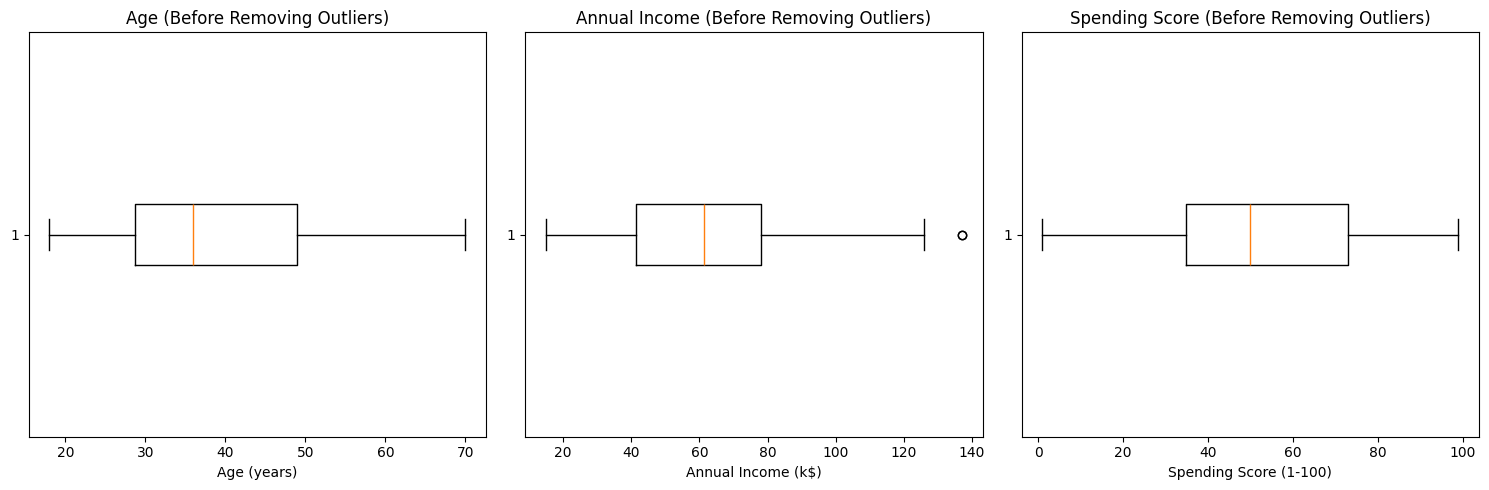

In [22]:
import matplotlib.pyplot as plt

# Plot boxplots for each column with outliers
plt.figure(figsize=(15, 5))

# Age
plt.subplot(1, 3, 1)
plt.boxplot(df['Age'], vert=False)
plt.title("Age (Before Removing Outliers)")
plt.xlabel("Age (years)")

# Annual Income
plt.subplot(1, 3, 2)
plt.boxplot(df['Annual Income (k$)'], vert=False)
plt.title("Annual Income (Before Removing Outliers)")
plt.xlabel("Annual Income (k$)")

# Spending Score
plt.subplot(1, 3, 3)
plt.boxplot(df['Spending Score (1-100)'], vert=False)
plt.title("Spending Score (Before Removing Outliers)")
plt.xlabel("Spending Score (1-100)")

plt.tight_layout()
plt.show()


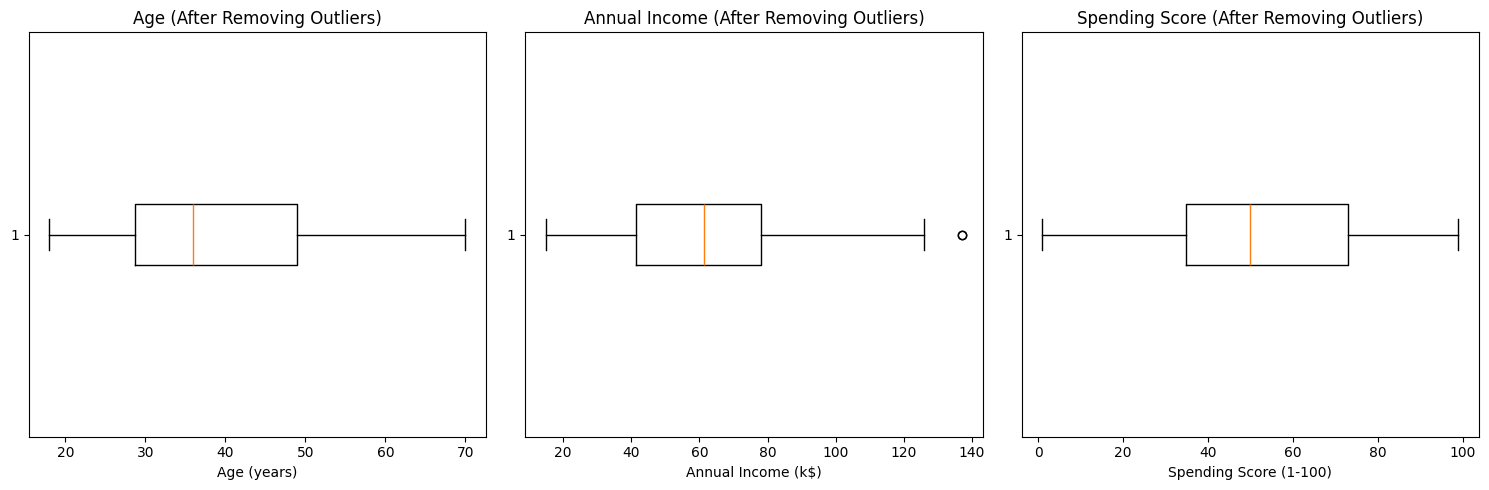

In [23]:
# Plot boxplots for each column after removing outliers
plt.figure(figsize=(15, 5))

# Age
plt.subplot(1, 3, 1)
plt.boxplot(df['Age'], vert=False)
plt.title("Age (After Removing Outliers)")
plt.xlabel("Age (years)")

# Annual Income
plt.subplot(1, 3, 2)
plt.boxplot(df['Annual Income (k$)'], vert=False)
plt.title("Annual Income (After Removing Outliers)")
plt.xlabel("Annual Income (k$)")

# Spending Score
plt.subplot(1, 3, 3)
plt.boxplot(df['Spending Score (1-100)'], vert=False)
plt.title("Spending Score (After Removing Outliers)")
plt.xlabel("Spending Score (1-100)")

plt.tight_layout()
plt.show()


After Removing Outliers
Age:

No significant change as the column had no visible outliers in the original data.
Annual Income (k$):
Outliers beyond the upper whisker have been removed, resulting in a tighter boxplot distribution.
Spending Score (1-100):
The outliers near the upper whisker (values close to 100) have been removed, showing a more compact data range.
Conclusion:
Removing outliers improves the distribution of the data, making it more robust for clustering, regression, or other analyses.